In [6]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('TestVid2_deepocsort.csv')
x = list(df['x'])
y = list(df['y'])


In [18]:
import numpy as np

# Set threshold for absolute difference and window size for moving average
threshold = 10
window_size = 3
half = window_size // 2

# Calculate moving average of x and y values using a rolling window
x_rolling_mean = np.convolve(x, np.ones(window_size), 'full') / window_size
y_rolling_mean = np.convolve(y, np.ones(window_size), 'full') / window_size

# Initialize output lists for x and y values
x_out = [x[0]]
y_out = [y[0]]

# Loop over all values
for i in range(1, len(x)):
    # Calculate absolute difference between current and previous x and y values
    dx = abs(x[i] - x[i-1])
    dy = abs(y[i] - y[i-1])
    
    # If absolute difference is greater than threshold, replace current value with moving average
    if dx > threshold:
        x_out.append(x_rolling_mean[i-1])
    else:
        x_out.append(x[i])
    if dy > threshold:
        y_out.append(y_rolling_mean[i-1])
    else:
        y_out.append(y[i])


In [20]:
#put the x_out and y_out into a dataframe and save it as a csv
df_out = pd.DataFrame({'x':x_out, 'y':y_out})
df_out.to_csv('TestVid2_deepocsort_smoothed2.csv', index=False)


In [ ]:
#We will use the threshold to determine if the point is an outlier or not and applying the moving average to smooth the data


In [ ]:
#Apply autoregression to smooth the data


In [ ]:
#Apply dynamics equation to correct outliers

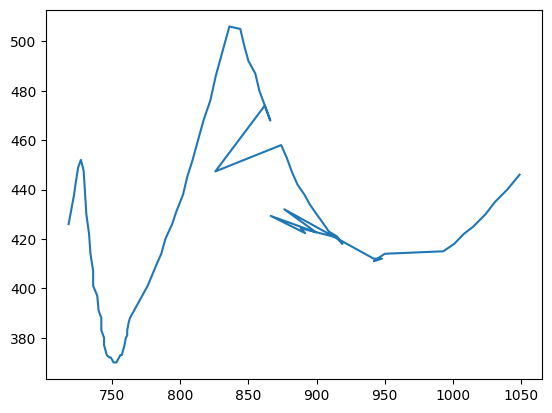

In [19]:
#plot the smoothed data
plt.plot(x_out, y_out)